# Exercise 3: Inspect your clustering

Let's now inspect the clustering you performed in the previous exercise!

**Step 1:** Load the dataset _(written for you)_.

In [1]:
import pandas as pd

df = pd.read_csv('../datasets/ch1ex1.csv')
points = df.values

**Step 2:** Run your solution to the previous exercise _(filled in for you)._

In [2]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(points)
labels = model.predict(points)

**Step 3:** Import `matplotlib.pyplot` as `plt`

In [3]:
import matplotlib.pyplot as plt

**Step 4:** Assign column `0` of `points` to `xs`, and column `1` of `points` to `ys`

In [4]:
xs = points[:,0]
ys = points[:,1]

**Step 5:** Make a scatter plot of `xs` and `ys`, specifying the `c=labels` keyword arguments to color the points by their cluster label.  You'll see that KMeans has done a good job of identifying the clusters!

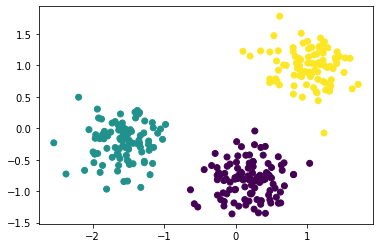

In [5]:
plt.scatter(xs,ys,c=labels)
plt.show()

**This is great**, but let's go one step further, and add the cluster centres (the "centroids") to the scatter plot.

**Step 6:** Obtain the coordinates of the centroids using the `.cluster_centers_` attribute of `model`.  Assign them to `centroids`.

In [6]:
centroids = model.cluster_centers_
centroids

array([[ 0.18034887, -0.81701955],
       [-1.57568905, -0.22531944],
       [ 1.01378685,  0.98288627]])

**Step 7:** Assign column `0` of `centroids` to `centroids_x`, and column `1` of `centroids` to `centroids_y`.

In [7]:
centroids_x = centroids[0]
centroids_y = centroids[1]

**Step 8:** In a single cell, create two scatter plots (this will show the two on top of one another).  Call `plt.show()` just once, at the end.

Firstly, the make the scatter plot you made above.  Secondly, make a scatter plot of `centroids_x` and `centroids_y`, using `'X'` (a cross) as a marker by specifying the `marker` parameter. Set the size of the markers to be `200` using `s=200`.

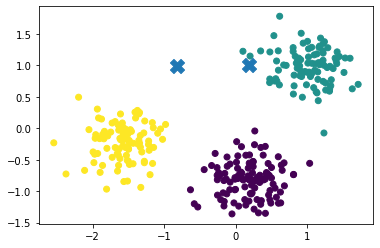

In [15]:
plt.scatter(xs,ys,c=labels)
plt.scatter(centroids_x,centroids_y,marker='X',s=200)
plt.show()


**Great work!** The centroids are important because they are what enables KMeans to assign new, previously unseen points to the existing clusters.

## How to choose the best K 

### Elbow method

Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. We pick k at the spot where SSE starts to flatten out and forming an elbow

c:\Users\T430\anaconda3\envs\strive\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


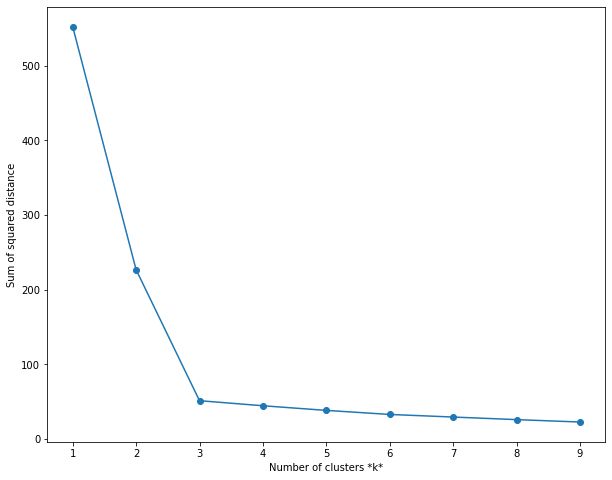

In [12]:

# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(points)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(10, 8))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');
plt.show()

The graph shows that k = 3 will be a good choice 

https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a,
https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1